<a href="https://colab.research.google.com/github/harshith7823/CS760-Project/blob/main/part-1/Death%20prediction/Model%20generated%20death%20column/part1_model_based.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [124]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from numpy import mean
from numpy import std
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso, ElasticNetCV,RidgeCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt

In [125]:
oppScrData = pd.read_excel(r'sample_data/OppScrData.xlsx')

In [126]:
def clean_ct_data(oppScrData):
    # Delete rows with empty values
    cols = ["L1_HU_BMD", "TAT Area (cm2)", 'Total Body                Area EA (cm2)',
       'VAT Area (cm2)', 'SAT Area (cm2)', 'VAT/SAT     Ratio', 'Muscle HU',
       ' Muscle Area (cm2)', 'L3 SMI (cm2/m2)', 'AoCa        Agatston',
       'Liver HU    (Median)', 'DEATH [d from CT]']
    ct_data= oppScrData[cols]
    n = ct_data.shape[0]
    preprocessed_ct_data = pd.DataFrame( columns=cols)
    for i in range(n):
        row = ct_data.loc[i]
        ignore = False
        for k,j in enumerate(row):
          if pd.isna(j) or j == ' ': 
            if k == 11:              
              ignore = False
            else:
              ignore = True
              break
        if not ignore:
          preprocessed_ct_data.loc[i]= row
    return preprocessed_ct_data

In [127]:
sc = StandardScaler()
ct_data = clean_ct_data(oppScrData=oppScrData)

In [128]:
non_null_death_rows = ct_data[~ct_data['DEATH [d from CT]'].isnull()]
print(non_null_death_rows.shape)
print(non_null_death_rows.columns)

(493, 12)
Index(['L1_HU_BMD', 'TAT Area (cm2)',
       'Total Body                Area EA (cm2)', 'VAT Area (cm2)',
       'SAT Area (cm2)', 'VAT/SAT     Ratio', 'Muscle HU',
       ' Muscle Area (cm2)', 'L3 SMI (cm2/m2)', 'AoCa        Agatston',
       'Liver HU    (Median)', 'DEATH [d from CT]'],
      dtype='object')


In [129]:
# Convert to years
non_null_death_rows['DEATH [d from CT]'] /= 365

X = non_null_death_rows.iloc[:, 0:11]
y = non_null_death_rows.iloc[:, 11]
X = pd.DataFrame(sc.fit_transform(X), columns = X.columns)

null_death_rows=ct_data[ct_data['DEATH [d from CT]'].isnull()]
X2 = null_death_rows.iloc[:, 0:11]
X2 = pd.DataFrame(sc.fit_transform(X2), columns = X2.columns)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [130]:
X_train, X_test, y_train, y_test  = train_test_split(X, y, test_size=0.2, random_state=0)

In [131]:
def testWithModel(model, X_train, X_test, y_train, y_test):
  clf = model
  clf.fit(X_train, y_train)
  y_pred = clf.predict(X_test)

  print(f'MAE = {mean_absolute_error(y_test, y_pred)}') 
  print(f'MAPE = {mean_absolute_percentage_error(y_test, y_pred)}')
  print(f'RMSE = {mean_squared_error(y_test, y_pred)**0.5}')

  plot_results(y_test, y_pred)

  return y_pred

In [132]:
def plot_results(y_test, y_pred):
  plt.figure()
  y_test_sub, y_pred_sub = y_test, y_pred
  if len(y_test)>200:
    y_test_sub, y_pred_sub = y_test[::15], y_pred[::15]
    
  x = [i+1 for i in range(len(y_test_sub))]
  plt.plot((x,x),([i for i in y_pred_sub], [j for j in y_test_sub]),c='green',markevery=5,)
  plt.scatter(x, y_pred_sub, label="predicted_y")
  plt.scatter(x, y_test_sub, label="actual_y")
  plt.xlabel("X")
  plt.ylabel("Y")
  plt.legend()
  plt.show()

MAE = 2.7602421790301745
MAPE = 4.059821074779301
RMSE = 3.3082769109535644


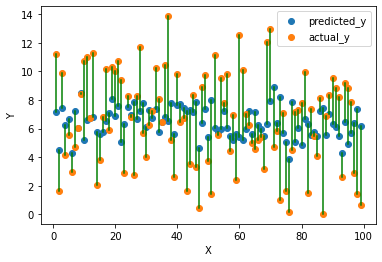

In [133]:
RFparams2={'n_estimators':[50],
          'min_samples_split':[16],
          'min_samples_leaf': [4],
           'max_features': [6],
           'max_depth': [20],
           'bootstrap': [True]}


rf = RandomForestRegressor(random_state = 21)
clf_random_forest = GridSearchCV(rf, RFparams2, refit=True)
rf_pred = testWithModel(clf_random_forest ,X_train, X_test, y_train, y_test)

MAE = 2.777563760826399
MAPE = 3.784858071420441
RMSE = 3.311534916910759


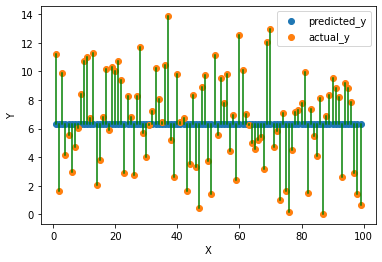

In [134]:
lasso_pred = testWithModel(Lasso(alpha=0.5), X_train, X_test, y_train, y_test)

MAE = 2.747641137627119
MAPE = 4.038622420365689
RMSE = 3.2960287236612564


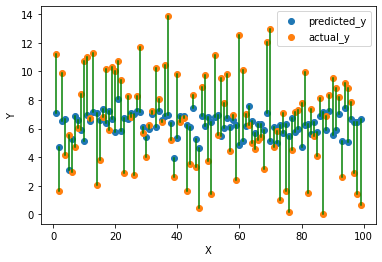

In [135]:
ridge_pred = testWithModel(RidgeCV(),X_train, X_test, y_train, y_test)

MAE = 2.719313684793137
MAPE = 4.192761817399197
RMSE = 3.3737524283780953


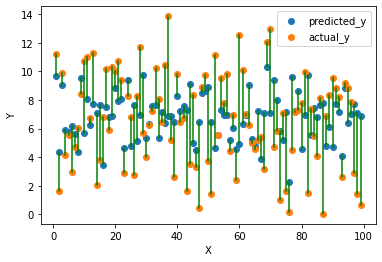

In [136]:
knn_pred = testWithModel(KNeighborsRegressor(),X_train, X_test, y_train, y_test)

MAE = 3.997509339975094
MAPE = 5.156023159238672
RMSE = 4.8918538327633545


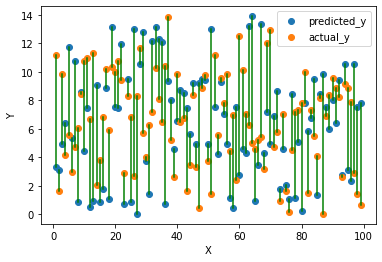

In [137]:
dtree_pred = testWithModel(DecisionTreeRegressor(criterion="absolute_error"),X_train, X_test, y_train, y_test)

MAE = 2.748094198258288
MAPE = 4.0262614026053205
RMSE = 3.2951139160270126


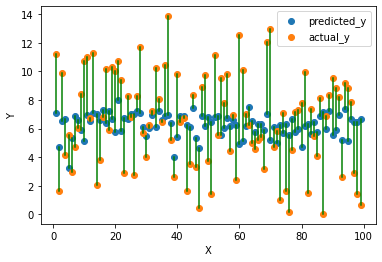

In [138]:
elastic_pred = testWithModel(ElasticNetCV(random_state=0), X_train, X_test, y_train, y_test)

MAE = 3.685610259644844
MAPE = 4.438776918497148
RMSE = 4.619371975351323


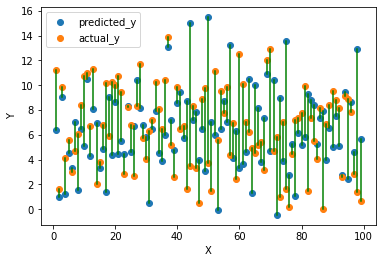

In [139]:
svr_pred = testWithModel(SVR(C=300, epsilon=0.8),X_train, X_test, y_train, y_test)

Fill death col using random forest

In [140]:
null_death_rows['DEATH [d from CT]'] = clf_random_forest.predict(X2)
df = pd.concat([non_null_death_rows,null_death_rows])
y = df.iloc[:,11]
X = df.iloc[:, 0:11]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [79]:
print(X.shape)

(8878, 11)


In [141]:
X_train, X_test, y_train, y_test  = train_test_split(X, y, test_size=0.2)

MAE = 0.6734753709737119
MAPE = 0.3085921090271447
RMSE = 1.0846831792416924


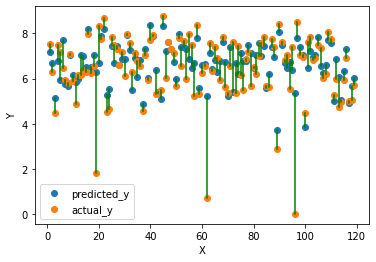

In [142]:
knn = KNeighborsRegressor(n_neighbors=9)
param_grid2 = dict(weights = ["uniform", "distance"])
knn_pred = testWithModel(GridSearchCV(knn, param_grid2),X_train, X_test, y_train, y_test)

MAE = 0.6738832101717864
MAPE = 0.3088528394474001
RMSE = 1.0593017015096071


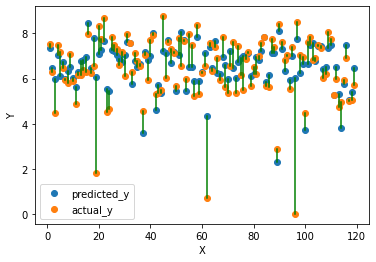

In [143]:
svr_pred = testWithModel(SVR(C=300, epsilon=0.8),X_train, X_test, y_train, y_test)

MAE = 0.8467062239154675
MAPE = 0.3715394049530795
RMSE = 1.2154470047438155


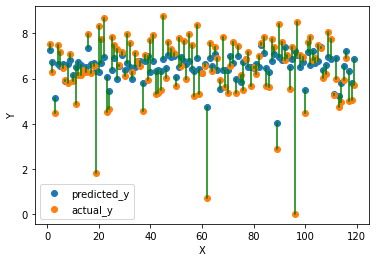

In [144]:
lasso_pred = testWithModel(Lasso(alpha=0.1), X_train, X_test, y_train, y_test)

MAE = 0.8475502317384208
MAPE = 0.3665669813822148
RMSE = 1.2150919472923327


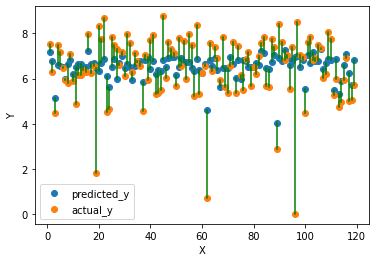

In [145]:
elastic_net_pred = testWithModel(ElasticNetCV(random_state=0), X_train, X_test, y_train, y_test)

MAE = 0.7120735801837739
MAPE = 0.29794947834677676
RMSE = 1.3332800533029763


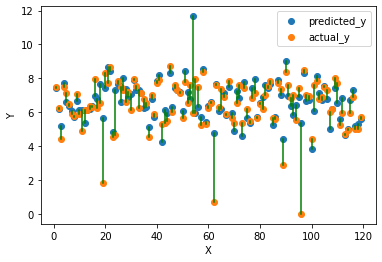

In [146]:
dtree_pred = testWithModel(DecisionTreeRegressor(criterion="absolute_error"),X_train, X_test, y_train, y_test)

Build Ensemble

In [163]:
array_preds = np.array([elastic_net_pred, knn_pred, svr_pred, lasso_pred, dtree_pred])
y_ens = np.mean((array_preds), axis=0 )

MAE = 0.637139714920902
MAPE = 0.10121525646427254
RMSE = 1.0367534613166904


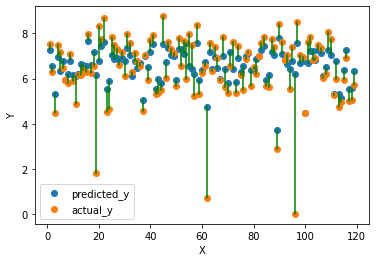

In [164]:
print(f'MAE = {mean_absolute_error(y_ens, y_test)}')
print(f'MAPE = {mean_absolute_percentage_error(y_ens, y_test)}')
print(f'RMSE = {mean_squared_error(y_ens, y_test)**0.5}')
plot_results(y_test, y_ens)

In [165]:
print(array_preds.shape)

(5, 1776)


In [166]:
import random
y_ens=[]

for i,y in enumerate(y_test):

  j = random.randint(0, 4)
  y_ens.append( array_preds[j][i])

In [167]:
len(y_ens)

1776

MAE = 0.7608142794750827
MAPE = 0.14159440176586924
RMSE = 1.202200166977953


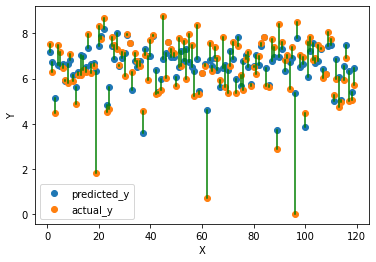

In [168]:
print(f'MAE = {mean_absolute_error(y_ens, y_test)}')
print(f'MAPE = {mean_absolute_percentage_error(y_ens, y_test)}')
print(f'RMSE = {mean_squared_error(y_ens, y_test)**0.5}')
plot_results(y_test, y_ens)